# This notebook will aggregate all the clusters to output a global vision of the different clusters predicted batches vs the optimal clusters batches

In [1]:
# Magic line to avoid explicitely write plt.show()
%matplotlib inline

In [2]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Check that it is working at a cluster level

In [3]:
import pandas as pd

In [4]:
sales_clusters_df=pd.read_csv('../data/raw/sales_cluster_table.csv')

sales_clusters_df['noisy_date']=pd.to_datetime(sales_clusters_df['noisy_date'])
sales_clusters_df.rename(index=str,
                        columns={'product_code':'product'},inplace=True)

In [5]:
import FaaS

  6%|▌         | 1/17 [00:00<00:01,  9.52it/s]

-----------------------------------------
Optimizing the actual data for cluster #1
-----------------------------------------


100%|██████████| 17/17 [00:01<00:00, 13.73it/s]


------------------------------
The workload is reduced by 17%
------------------------------


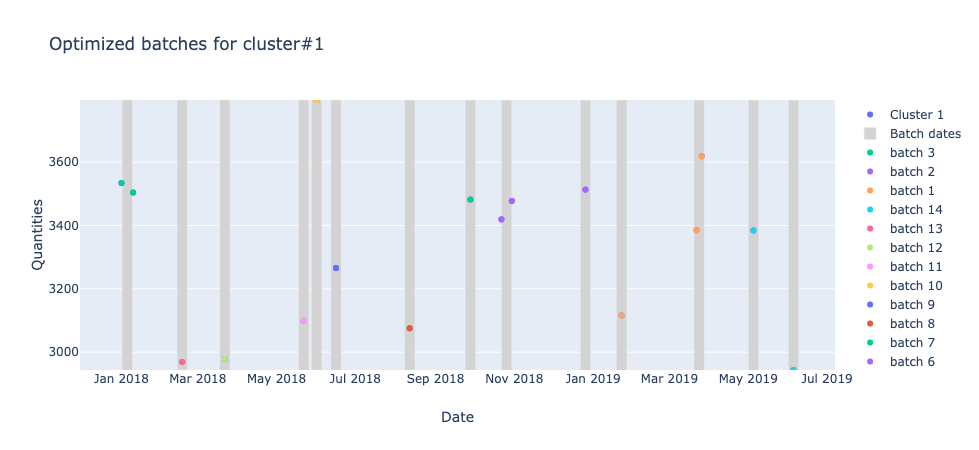

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #1
----------------------------------------------------------------------------
---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


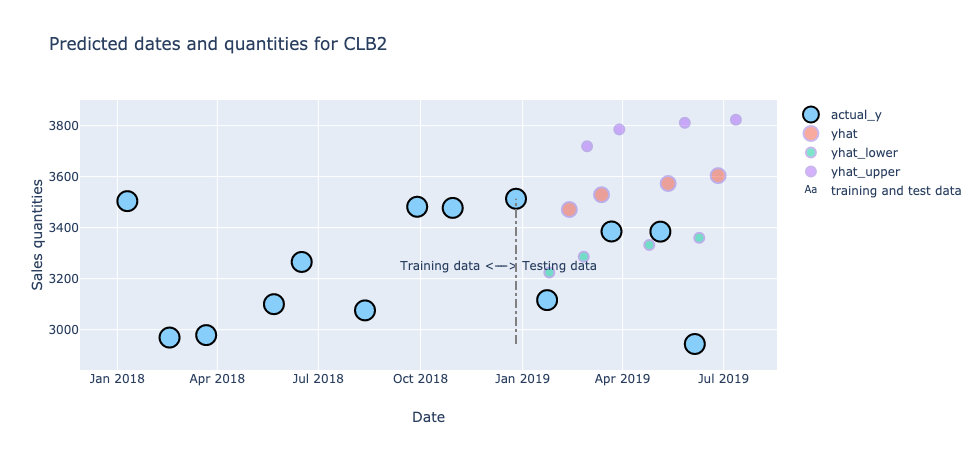

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


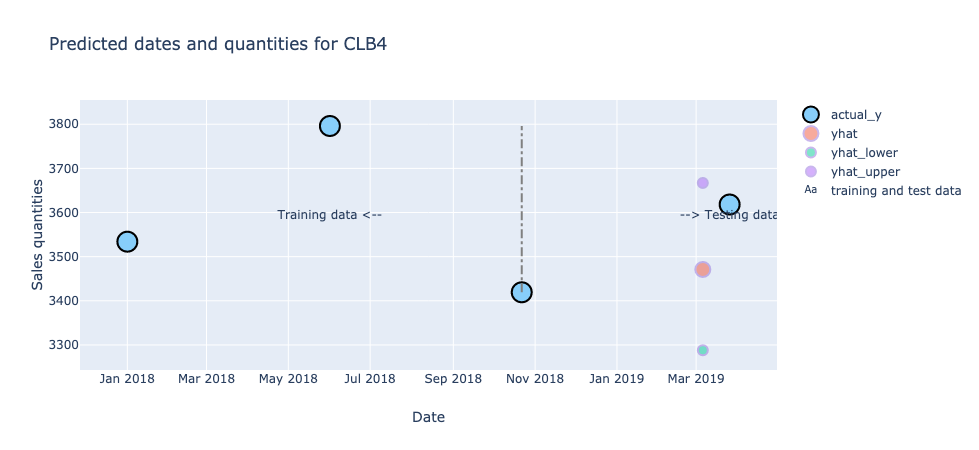

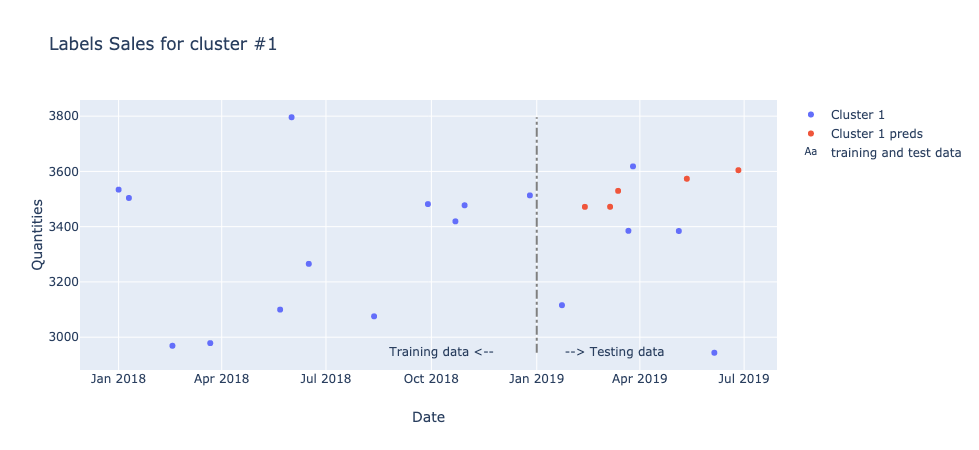

  7%|▋         | 1/15 [00:00<00:01,  8.58it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 15/15 [00:01<00:00, 10.54it/s]


-----------------------------
The workload is reduced by 6%
-----------------------------


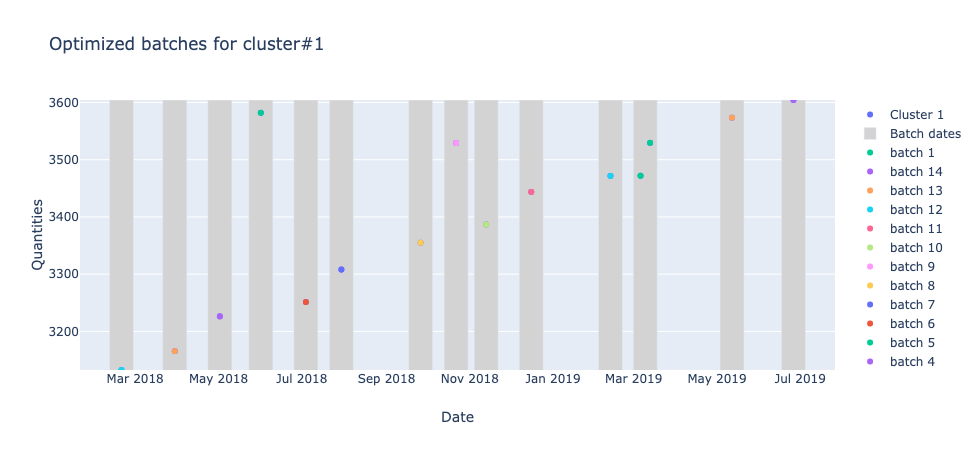

-----------------------------------------------------------------
The predicted quantities represent 90.2% of the actual quantities
-----------------------------------------------------------------


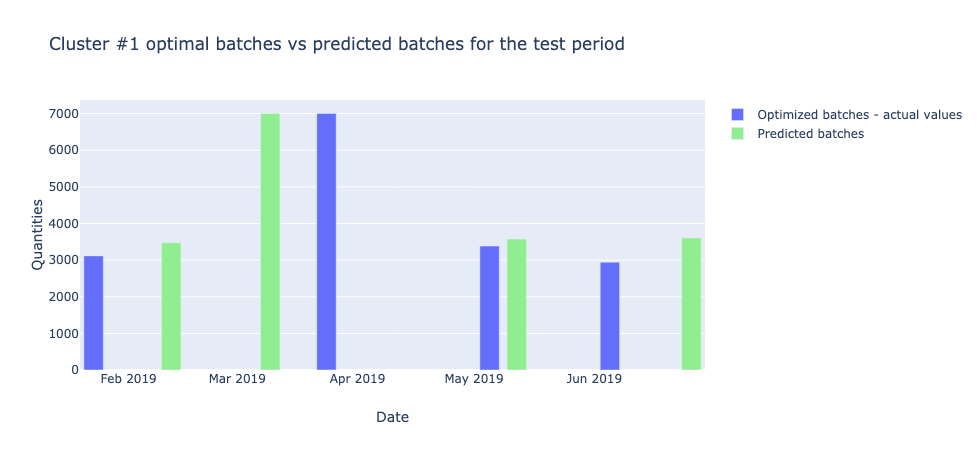

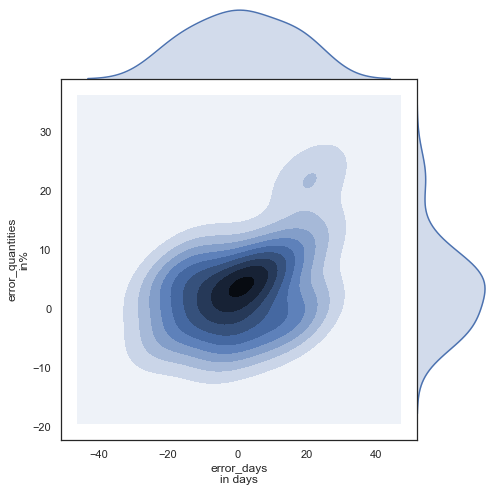

In [9]:
(batch_dates_n_quantities_cluster,
           batch_dates_n_predicted_quantities_cluster,
full_preds)=FaaS.get_cluster_level_predicted_batches(sales_clusters_df,
                                                                                          1,detailed_view=True)

In [7]:
batch_dates_n_quantities_cluster.head()

batch_date   quantities  \
0  2018-01-05 12:00:00  7037.814648   
1  2018-02-17 00:00:00  2968.984969   
2  2018-03-22 00:00:00  2978.611357   
3  2018-05-22 00:00:00  3099.865809   
4  2018-06-01 00:00:00  3796.020707   

                       products_quantities_and_dates  
0  [[CLB4, 3533.953445820421, 2018-01-01 00:00:00...  
1   [[CLB2, 2968.984969012328, 2018-02-17 00:00:00]]  
2   [[CLB2, 2978.611357110885, 2018-03-22 00:00:00]]  
3  [[CLB2, 3099.8658091290936, 2018-05-22 00:00:00]]  
4  [[CLB4, 3796.0207066890894, 2018-06-01 00:00:00]]

In [10]:
full_preds.head()

ds     yhat_qty  yhat_lower_qty  yhat_upper_qty  yhat_date  \
0 2018-01-10  3094.592742     2842.045626     3327.701811        NaT   
1 2018-02-17  3132.502771     2895.429010     3375.203474 2018-02-19   
2 2018-03-22  3165.424645     2919.946734     3400.812892 2018-03-30   
3 2018-05-22  3226.280237     2974.447065     3453.061223 2018-05-02   
4 2018-06-16  3251.221062     3018.901860     3478.351242 2018-07-04   

  yhat_lower_date yhat_upper_date            y product error_days  \
0             NaT             NaT  3503.861202    CLB2        NaT   
1      2018-02-04      2018-03-07  2968.984969    CLB2     2 days   
2      2018-03-12      2018-04-14  2978.611357    CLB2     8 days   
3      2018-04-16      2018-05-17  3099.865809    CLB2   -20 days   
4      2018-06-18      2018-07-20  3265.403792    CLB2    18 days   

   error_quantities  
0        -11.680499  
1          5.507532  
2          6.271825  
3          4.078061  
4         -0.434333

## 2. Now aggregating all the clusters!

In [7]:
clusters_list=sales_clusters_df['Cluster'].unique()

In [8]:
clusters_list

array([0, 2, 4, 1, 3])

  6%|▋         | 2/32 [00:00<00:02, 11.94it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 32/32 [00:01<00:00, 18.17it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


------------------------------
The workload is reduced by 40%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #0
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 28/28 [00:01<00:00, 16.99it/s]


------------------------------
The workload is reduced by 25%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 87.6% of the actual quantities
-----------------------------------------------------------------


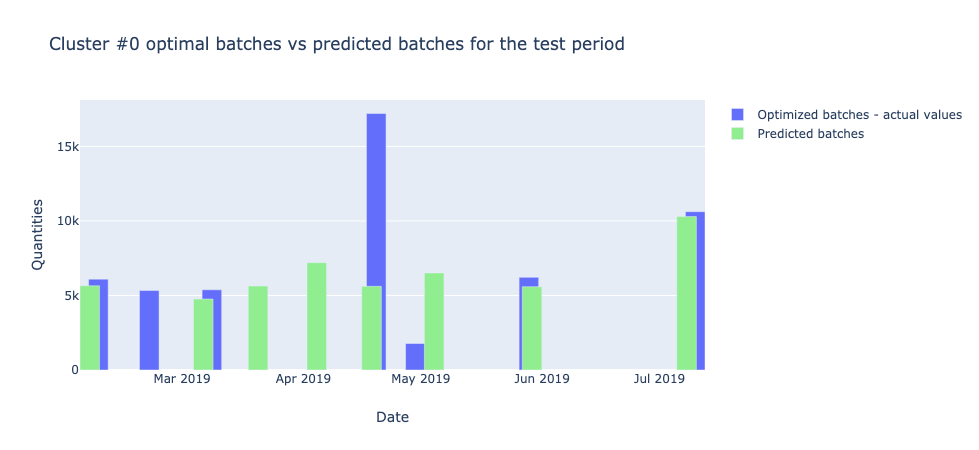

  0%|          | 0/4 [00:00<?, ?it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 4/4 [00:00<00:00,  6.02it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


-----------------------------
The workload is reduced by 0%
-----------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #2
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
  0%|          | 0/3 [00:00<?, ?it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 3/3 [00:00<00:00,  8.71it/s]


-----------------------------
The workload is reduced by 0%
-----------------------------
-----------------------------------------------------------------
The predicted quantities represent 74.7% of the actual quantities
-----------------------------------------------------------------


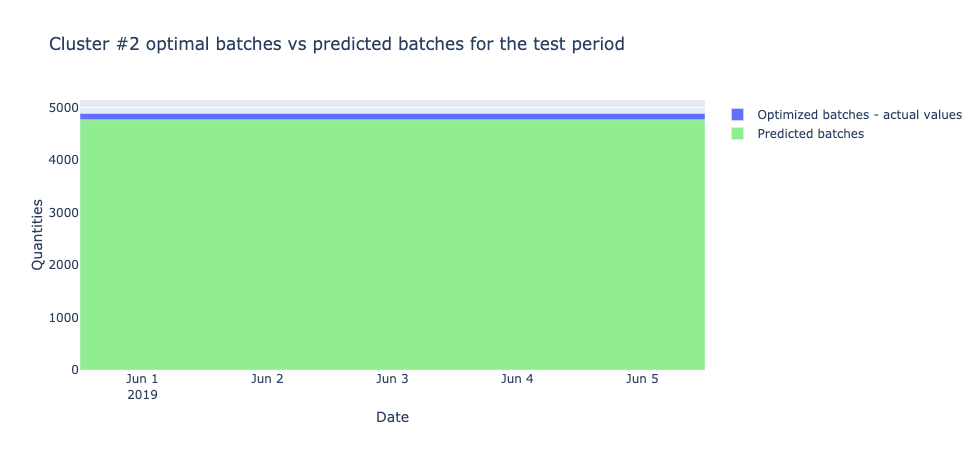

  0%|          | 0/78 [00:00<?, ?it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 78/78 [00:06<00:00,  9.44it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


------------------------------
The workload is reduced by 53%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #4
----------------------------------------------------------------------------


INFO:fbprophet:n_changepoints greater than number of observations.Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run pr

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 73/73 [00:02<00:00, 33.03it/s]


------------------------------
The workload is reduced by 61%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 93.9% of the actual quantities
-----------------------------------------------------------------


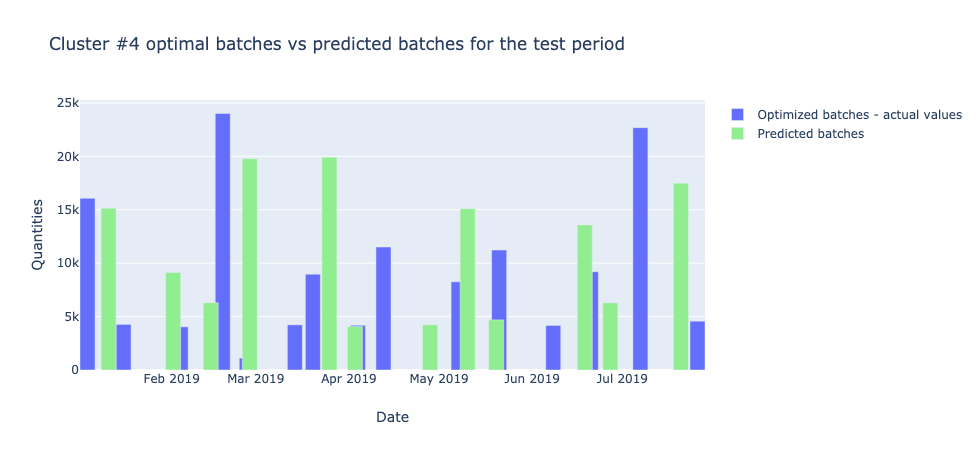

  0%|          | 0/17 [00:00<?, ?it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 17/17 [00:01<00:00, 12.83it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


------------------------------
The workload is reduced by 17%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #1
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 15/15 [00:01<00:00, 13.97it/s]


-----------------------------
The workload is reduced by 6%
-----------------------------
-----------------------------------------------------------------
The predicted quantities represent 90.2% of the actual quantities
-----------------------------------------------------------------


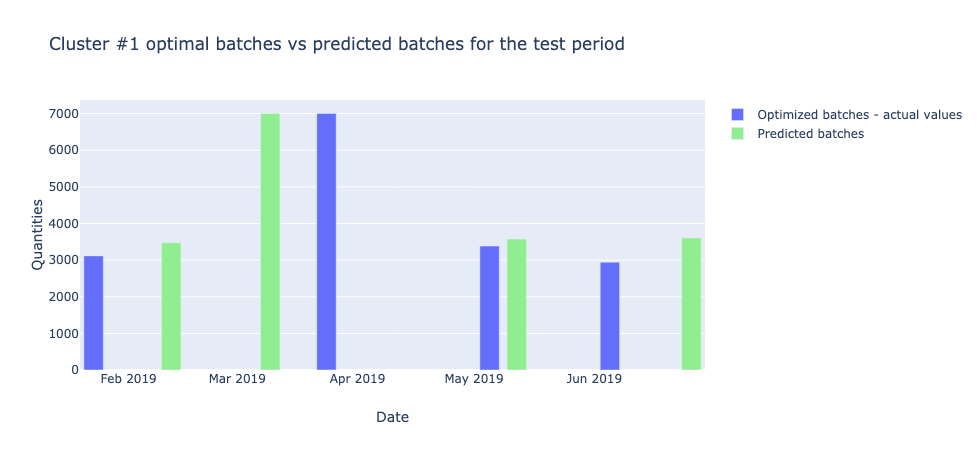

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 148/148 [00:03<00:00, 44.13it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


------------------------------
The workload is reduced by 72%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #3
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|▏         | 2/146 [00:00<00:11, 12.89it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 146/146 [00:03<00:00, 47.84it/s]


------------------------------
The workload is reduced by 72%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 99.0% of the actual quantities
-----------------------------------------------------------------


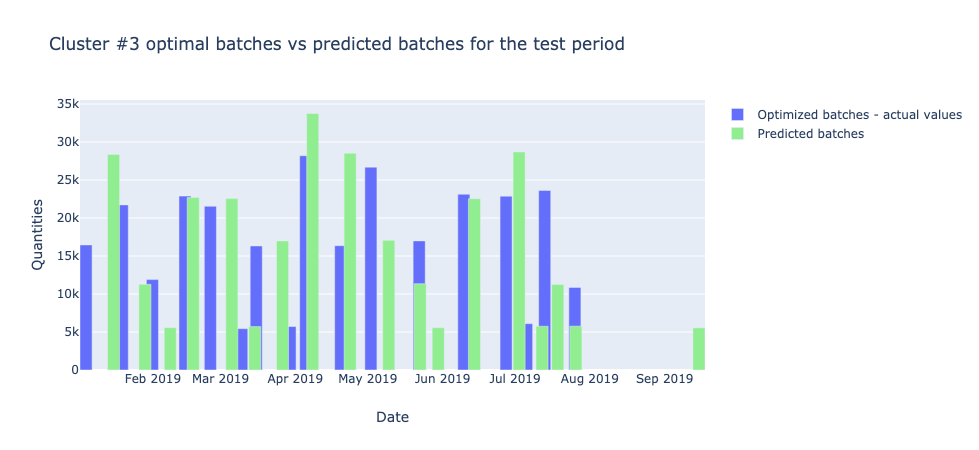

In [9]:
optimal_batches=[]
predicted_batches=[]
for cluster in clusters_list:
    local_optimal_batches,local_predicted_batches=FaaS.get_cluster_level_predicted_batches(sales_clusters_df,
                                                                                          cluster)
    local_optimal_batches['Cluster']=cluster
    local_predicted_batches['Cluster']=cluster
    optimal_batches.append(local_optimal_batches)
    predicted_batches.append(local_predicted_batches)

In [10]:
optimal_batches[1]

batch_date   quantities  \
0  2017-12-31 00:00:00  4858.555134   
1  2018-07-02 00:00:00  4401.677868   
2  2018-12-22 00:00:00  4914.696562   
3  2019-06-03 00:00:00  4887.345789   

                       products_quantities_and_dates  Cluster  
0   [[CLA1, 4858.555133623407, 2017-12-31 00:00:00]]        2  
1  [[CLA1, 4401.6778680767075, 2018-07-02 00:00:00]]        2  
2  [[CLA1, 4914.6965621287045, 2018-12-22 00:00:00]]        2  
3   [[CLA1, 4887.345788680755, 2019-06-03 00:00:00]]        2

In [11]:
optimal_batches=pd.concat(optimal_batches)

optimal_batches.reset_index(drop=True,
                            inplace=True)

In [12]:
predicted_batches=pd.concat(predicted_batches)
predicted_batches.reset_index(drop=True,
                            inplace=True)

In [13]:
optimal_batches.head()

batch_date    quantities  \
0  2017-12-28 12:00:00  19447.996610   
1  2018-02-11 00:00:00   6181.772772   
2  2018-03-15 00:00:00  10236.085409   
3  2018-05-01 00:00:00   5241.655174   
4  2018-05-18 00:00:00   4676.433462   

                       products_quantities_and_dates  Cluster  
0  [[CLB1, 6314.400965995367, 2017-12-26 00:00:00...        0  
1   [[CLB1, 6181.772772121883, 2018-02-11 00:00:00]]        0  
2  [[CLA0, 4658.195180889406, 2018-03-11 00:00:00...        0  
3     [[CLB1, 5241.6551738544, 2018-05-01 00:00:00]]        0  
4   [[CLA0, 4676.433462461426, 2018-05-18 00:00:00]]        0

In [14]:
optimal_batches[optimal_batches['Cluster']==0]

batch_date    quantities  \
0   2017-12-28 12:00:00  19447.996610   
1   2018-02-11 00:00:00   6181.772772   
2   2018-03-15 00:00:00  10236.085409   
3   2018-05-01 00:00:00   5241.655174   
4   2018-05-18 00:00:00   4676.433462   
5   2018-06-10 00:00:00  14474.899028   
6   2018-07-25 00:00:00  11149.645988   
7   2018-08-20 00:00:00   5524.199876   
8   2018-10-01 00:00:00  10810.767744   
9   2018-11-10 12:00:00  12031.620337   
10  2018-11-23 00:00:00   1634.293585   
11  2018-12-24 00:00:00  10969.416660   
12  2019-02-08 00:00:00   6097.284359   
13  2019-02-21 00:00:00   5336.037630   
14  2019-03-09 00:00:00   5381.317226   
15  2019-04-20 00:00:00  17210.091058   
16  2019-04-30 00:00:00   1776.849890   
17  2019-05-29 00:00:00   6215.565413   
18  2019-07-10 12:00:00  10622.318768   

                        products_quantities_and_dates  Cluster  
0   [[CLB1, 6314.400965995367, 2017-12-26 00:00:00...        0  
1    [[CLB1, 6181.772772121883, 2018-02-11 00:00:00]]        0  
2   [[CLA0, 4658.195180889406, 2018-03-11 00:00:00...        0  
3      [[CLB1, 5241.6551738544, 2018-05-01 00:00:00]]        0  
4    [[CLA0, 4676.433462461426, 2018-05-18 00:00:00]]        0  
5   [[CLB1, 5274.909500826835, 2018-06-06 00:00:00...        0  
6   [[CLA0, 5067.550234162787, 2018-07-25 00:00:00...        0  
7    [[CLB1, 5524.199875810919, 2018-08-20 00:00:00]]        0  
8   [[CLB1, 6208.139345831026, 2018-09-28 00:00:00...        0  
9   [[CLC0, 6829.46244357957, 2018-11-08 00:00:00]...        0  
10  [[CLD3, 1634.2935853641995, 2018-11-23 00:00:00]]        0  
11  [[CLA0, 4873.4629457846395, 2018-12-21 00:00:0...        0  
12   [[CLB1, 6097.284358823955, 2019-02-08 00:00:00]]        0  
13   [[CLA0, 5336.037630087328, 2019-02-21 00:00:00]]        0  
14  [[CLB1, 5381.3172263601255, 2019-03-09 00:00:00]]        0  
15  [[CLB1, 5811.909802552826, 2019-04-19 00:00:00...        0  
16  [[CLD3, 1776.8498901564392, 2019-04-30 00:00:00]]        0  
17   [[CLB1, 6215.565413288294, 2019-05-29 00:00:00]]        0  
18  [[CLA0, 5104.938013722983, 2019-07-07 00:00:00...        0

In [16]:
import plotly.graph_objs as go

In [17]:
test_date='2019-01-01'
test_year=test_date.split('-')[0]

In [18]:
max_waiting_time='10 days'

In [19]:
import plotly.express as px
grey_map=px.colors.qualitative.Dark2
green_map=px.colors.qualitative.Pastel2

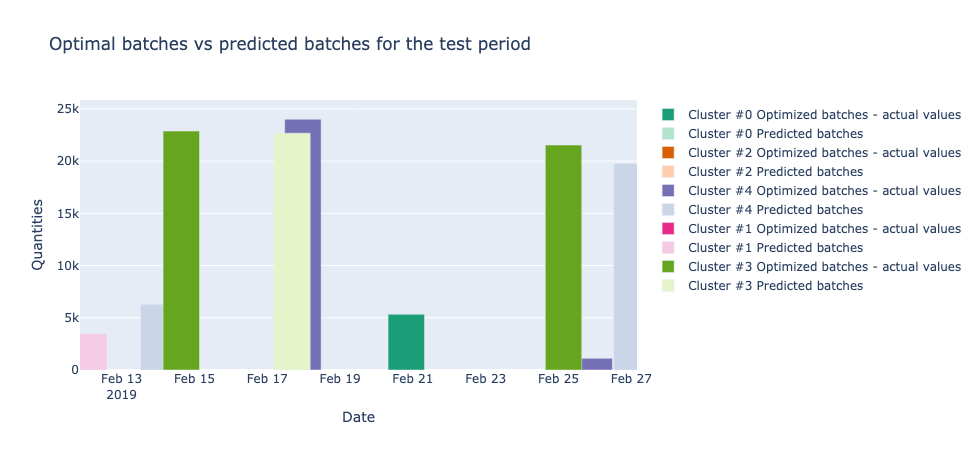

In [21]:
fig = go.Figure()

for (cluster,grey_color,green_color) in zip(clusters_list,grey_map,green_map):
    local_optimal=optimal_batches[optimal_batches['Cluster']==cluster]
    local_predicted=predicted_batches[predicted_batches['Cluster']==cluster]
    fig.add_trace(go.Bar(x=local_optimal[local_optimal['batch_date']>test_year]\
                     ['batch_date'], 
             y=local_optimal[local_optimal['batch_date']>test_year]\
                     ['quantities'],
                    name='Cluster #{}\nOptimized batches - actual values'.format(cluster),
                    width=2e2*pd.Timedelta(max_waiting_time).total_seconds()/2,
                        marker_color=grey_color))

    fig.add_trace(go.Bar(x=local_predicted[local_predicted['batch_date']>test_year]\
                     ['batch_date'], 
             y=local_predicted[local_predicted['batch_date']>test_year]\
                     ['predicted_quantities'],
                    name='Cluster #{}\nPredicted batches'.format(cluster),
                    width=2e2*pd.Timedelta(max_waiting_time).total_seconds()/2,
                        marker_color=green_color))

# Edit the layout
fig.update_layout(title='Optimal batches vs predicted batches for the test period',
               xaxis_title='Date',
               yaxis_title='Quantities')
fig.show()

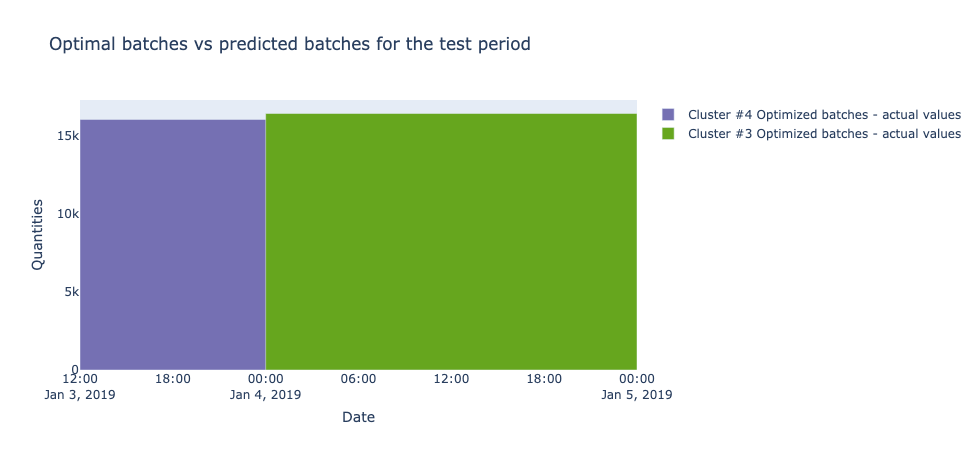

In [49]:
fig = go.Figure()
calendar_length='7 days'

for (cluster,grey_color,green_color) in zip(clusters_list,grey_map,green_map):
    local_optimal=optimal_batches[optimal_batches['Cluster']==cluster]
    local_predicted=predicted_batches[predicted_batches['Cluster']==cluster]
    fig.add_trace(go.Bar(x=local_optimal[(local_optimal['batch_date']>test_date)  & \
             (local_optimal['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                     ['batch_date'], 
             y=local_optimal[(local_optimal['batch_date']>test_date)  & \
             (local_optimal['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                     ['quantities'],
                    name='Cluster #{}\nOptimized batches - actual values'.format(cluster),
                    width=1e3*pd.Timedelta('1 day').total_seconds(),
                        marker_color=grey_color))

    fig.add_trace(go.Bar(x=local_predicted[(local_predicted['batch_date']>test_date)  & \
             (local_predicted['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                     ['batch_date'], 
             y=local_predicted[(local_predicted['batch_date']>test_date)  & \
             (local_predicted['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                     ['predicted_quantities'],
                    name='Cluster #{}\nPredicted batches'.format(cluster),
                    width=1e3*pd.Timedelta('1 day').total_seconds(),
                        marker_color=green_color))

# Edit the layout
fig.update_layout(title='Optimal batches vs predicted batches for the test period',
               xaxis_title='Date',
               yaxis_title='Quantities')
fig.show()

# Make it a function!
-  Input:
  -  The original sales dataframe
  -  The test date (start of the test data) --> the training data is automatically everything which is prior to this date
  -  The maximum waiting time (for optimization and batches generation) --> How many days clients are willing to wait!
-  Output:
  - Main graph with optimal batches vs predicted batches for the test data
  - The same graph zoomed in the week following the test date
  - 1 optimal batches df
  - 1 predicted batches df

In [56]:
def get_predicted_batches(sales_clusters_df,
                         test_date,
                         max_waiting_time,
                         detailed_view=False,
                         calendar_length='7 days'):
    
    '''This function takes the original sales df, 
    computes the dates and quantities models at a product level using the test_date to split the dataset,
    generates the predicted sales, 
    computes the associated "predicted" batches using the max waiting time value,
    computes the optimal batches using the actual data using the max waiting time value,
    outputs the optimal batches df and the predicted batches df,
    and 2 graphs to visualize it:
    
    -  Input:
      -  The original sales dataframe
      -  The test date (start of the test data) --> the training data is automatically all sales prior to this date
      -  The maximum waiting time
      -  The calendar length you want to zoom in
    -  Output:
      - Main graph with optimal batches vs predicted batches for the test data
      - The same graph zoomed in the week following the test date
      - 1 optimal batches df
      - 1 predicted batches df
    '''
    
    clusters_list=sales_clusters_df['Cluster'].unique()
    
    optimal_batches=[]
    predicted_batches=[]
    for cluster in clusters_list:
        local_optimal_batches,local_predicted_batches=FaaS.get_cluster_level_predicted_batches(sales_clusters_df,
                                                                                              cluster,
                                                                                               max_waiting_time,
                                                                                              test_date,
                                                                                              detailed_view)
        local_optimal_batches['Cluster']=cluster
        local_predicted_batches['Cluster']=cluster
        optimal_batches.append(local_optimal_batches)
        predicted_batches.append(local_predicted_batches)
        
    optimal_batches=pd.concat(optimal_batches)

    optimal_batches.reset_index(drop=True,
                            inplace=True)
    
    predicted_batches=pd.concat(predicted_batches)
    predicted_batches.reset_index(drop=True,
                            inplace=True)
    
    dark_map=px.colors.qualitative.Dark2
    pastel_map=px.colors.qualitative.Pastel2
    
    fig = go.Figure()

    for (cluster,dark_color,pastel_color) in zip(clusters_list,dark_map,pastel_map):
        local_optimal=optimal_batches[optimal_batches['Cluster']==cluster]
        local_predicted=predicted_batches[predicted_batches['Cluster']==cluster]
        fig.add_trace(go.Bar(x=local_optimal[local_optimal['batch_date']>test_date]\
                         ['batch_date'], 
                 y=local_optimal[local_optimal['batch_date']>test_date]\
                         ['quantities'],
                        name='Cluster #{}\nOptimized batches - actual values'.format(cluster),
                        width=2e2*pd.Timedelta(max_waiting_time).total_seconds()/2,
                            marker_color=dark_color))

        fig.add_trace(go.Bar(x=local_predicted[local_predicted['batch_date']>test_date]\
                         ['batch_date'], 
                 y=local_predicted[local_predicted['batch_date']>test_date]\
                         ['predicted_quantities'],
                        name='Cluster #{}\nPredicted batches'.format(cluster),
                        width=2e2*pd.Timedelta(max_waiting_time).total_seconds()/2,
                            marker_color=pastel_color))

    # Edit the layout
    fig.update_layout(title='Optimal batches vs predicted batches for the test period',
                   xaxis_title='Date',
                   yaxis_title='Quantities')
    fig.show()
    
    fig = go.Figure()

    for (cluster,dark_color,pastel_color) in zip(clusters_list,dark_map,pastel_map):
        local_optimal=optimal_batches[optimal_batches['Cluster']==cluster]
        local_predicted=predicted_batches[predicted_batches['Cluster']==cluster]
        fig.add_trace(go.Bar(x=local_optimal[(local_optimal['batch_date']>test_date)  & \
                 (local_optimal['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                         ['batch_date'], 
                 y=local_optimal[(local_optimal['batch_date']>test_date)  & \
                 (local_optimal['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                         ['quantities'],
                        name='Cluster #{}\nOptimized batches - actual values'.format(cluster),
                        width=1e3*pd.Timedelta('1 day').total_seconds(),
                            marker_color=dark_color))

        fig.add_trace(go.Bar(x=local_predicted[(local_predicted['batch_date']>test_date)  & \
                 (local_predicted['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                         ['batch_date'], 
                 y=local_predicted[(local_predicted['batch_date']>test_date)  & \
                 (local_predicted['batch_date']< str((pd.Timestamp(test_date)+pd.Timedelta(calendar_length))))]\
                         ['predicted_quantities'],
                        name='Cluster #{}\nPredicted batches'.format(cluster),
                        width=1e3*pd.Timedelta('1 day').total_seconds(),
                            marker_color=pastel_color))

    # Edit the layout
    fig.update_layout(title='Optimal batches vs predicted batches for the test period',
                   xaxis_title='Date',
                   yaxis_title='Quantities')
    fig.show()
    
    return (optimal_batches,predicted_batches)
    

In [57]:
help(get_predicted_batches)

Help on function get_predicted_batches in module __main__:

get_predicted_batches(sales_clusters_df, test_date, max_waiting_time, detailed_view=False, calendar_length='7 days')
    This function takes the original sales df, 
    computes the dates and quantities models at a product level using the test_date to split the dataset,
    generates the predicted sales, 
    computes the associated "predicted" batches using the max waiting time value,
    computes the optimal batches using the actual data using the max waiting time value,
    outputs the optimal batches df and the predicted batches df,
    and 2 graphs to visualize it:
    
    -  Input:
      -  The original sales dataframe
      -  The test date (start of the test data) --> the training data is automatically all sales prior to this date
      -  The maximum waiting time
      -  The calendar length you want to zoom in
    -  Output:
      - Main graph with optimal batches vs predicted batches for the test data
      - The s

In [66]:
import importlib
importlib.reload(FaaS)

<module 'FaaS' from '/Users/raphaelribard/Documents/03_Clients/01_BailPrint/Sales_Forecasting/sales_forecasting/notebooks/FaaS.py'>

  3%|▎         | 1/32 [00:00<00:12,  2.48it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 32/32 [00:07<00:00,  4.53it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


------------------------------
The workload is reduced by 40%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #0
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 28/28 [00:08<00:00,  3.03it/s]


------------------------------
The workload is reduced by 25%
------------------------------


  0%|          | 0/4 [00:00<?, ?it/s]

-----------------------------------------------------------------
The predicted quantities represent 87.6% of the actual quantities
-----------------------------------------------------------------
--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


-----------------------------
The workload is reduced by 0%
-----------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #2
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
  0%|          | 0/3 [00:00<?, ?it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


-----------------------------
The workload is reduced by 0%
-----------------------------


  1%|▏         | 1/78 [00:00<00:30,  2.56it/s]

-----------------------------------------------------------------
The predicted quantities represent 74.7% of the actual quantities
-----------------------------------------------------------------
--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 78/78 [00:13<00:00,  3.00it/s]


------------------------------
The workload is reduced by 53%
------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #4
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 73/73 [00:11<00:00,  6.63it/s]


------------------------------
The workload is reduced by 61%
------------------------------


  0%|          | 0/17 [00:00<?, ?it/s]

-----------------------------------------------------------------
The predicted quantities represent 93.9% of the actual quantities
-----------------------------------------------------------------
--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 17/17 [00:06<00:00,  2.11it/s]


------------------------------
The workload is reduced by 17%
------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #1
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 15/15 [00:05<00:00,  2.78it/s]


-----------------------------
The workload is reduced by 6%
-----------------------------


  0%|          | 0/148 [00:00<?, ?it/s]

-----------------------------------------------------------------
The predicted quantities represent 90.2% of the actual quantities
-----------------------------------------------------------------
--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 148/148 [00:15<00:00,  9.53it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


------------------------------
The workload is reduced by 72%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #3
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  0%|          | 0/146 [00:00<?, ?it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 146/146 [00:15<00:00,  9.67it/s]


------------------------------
The workload is reduced by 72%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 99.0% of the actual quantities
-----------------------------------------------------------------


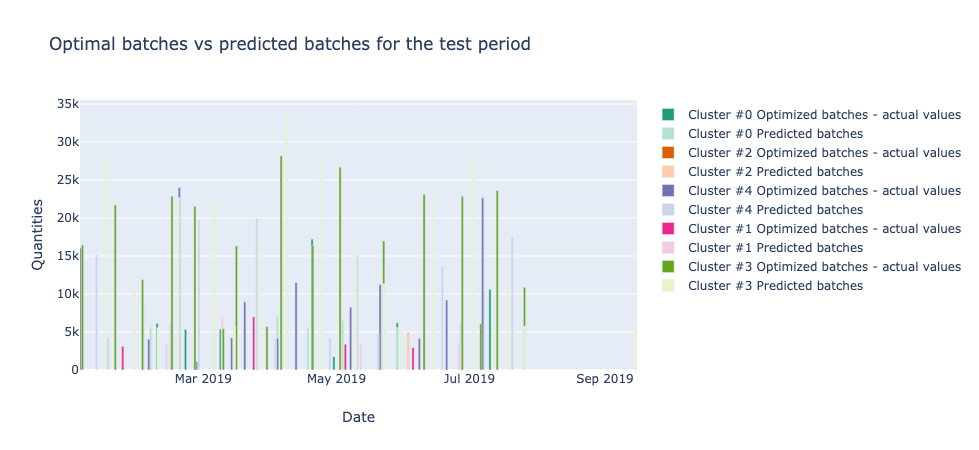

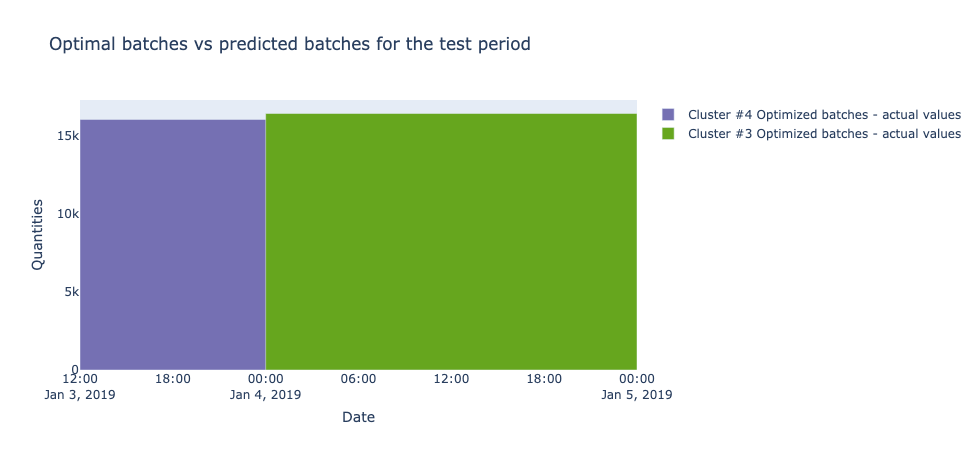

CPU times: user 3min 36s, sys: 2.11 s, total: 3min 39s
Wall time: 3min 49s


In [62]:
%%time
optimal_batches,predicted_batches=get_predicted_batches(sales_clusters_df,
                                                       '2019-01-01','10 days')

In [67]:
import importlib
importlib.reload(FaaS)

<module 'FaaS' from '/Users/raphaelribard/Documents/03_Clients/01_BailPrint/Sales_Forecasting/sales_forecasting/notebooks/FaaS.py'>

  3%|▎         | 1/32 [00:00<00:03,  9.16it/s]

-----------------------------------------
Optimizing the actual data for cluster #0
-----------------------------------------


100%|██████████| 32/32 [00:01<00:00, 30.33it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


------------------------------
The workload is reduced by 53%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #0
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 28/28 [00:00<00:00, 28.98it/s]


------------------------------
The workload is reduced by 42%
------------------------------


100%|██████████| 4/4 [00:00<00:00, 17.04it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


-----------------------------------------------------------------
The predicted quantities represent 87.6% of the actual quantities
-----------------------------------------------------------------
-----------------------------------------
Optimizing the actual data for cluster #2
-----------------------------------------
-----------------------------
The workload is reduced by 0%
-----------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #2
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
100%|██████████| 3/3 [00:00<00:00, 17.20it/s]

-----------------------------
Optimizing the predicted data
-----------------------------
-----------------------------
The workload is reduced by 0%
-----------------------------



  4%|▍         | 3/78 [00:00<00:03, 24.64it/s]

-----------------------------------------------------------------
The predicted quantities represent 74.7% of the actual quantities
-----------------------------------------------------------------
-----------------------------------------
Optimizing the actual data for cluster #4
-----------------------------------------


100%|██████████| 78/78 [00:01<00:00, 63.77it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


------------------------------
The workload is reduced by 75%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #4
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 73/73 [00:01<00:00, 57.20it/s]


------------------------------
The workload is reduced by 71%
------------------------------


 12%|█▏        | 2/17 [00:00<00:00, 16.98it/s]

-----------------------------------------------------------------
The predicted quantities represent 93.9% of the actual quantities
-----------------------------------------------------------------
-----------------------------------------
Optimizing the actual data for cluster #1
-----------------------------------------


100%|██████████| 17/17 [00:00<00:00, 22.88it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


------------------------------
The workload is reduced by 23%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #1
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabli

-----------------------------
Optimizing the predicted data
-----------------------------


  0%|          | 0/148 [00:00<?, ?it/s]

-----------------------------
The workload is reduced by 6%
-----------------------------
-----------------------------------------------------------------
The predicted quantities represent 90.2% of the actual quantities
-----------------------------------------------------------------
-----------------------------------------
Optimizing the actual data for cluster #3
-----------------------------------------


100%|██████████| 148/148 [00:01<00:00, 103.68it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


------------------------------
The workload is reduced by 85%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #3
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|▏         | 2/146 [00:00<00:08, 16.94it/s]

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 146/146 [00:01<00:00, 101.84it/s]


------------------------------
The workload is reduced by 84%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 99.0% of the actual quantities
-----------------------------------------------------------------


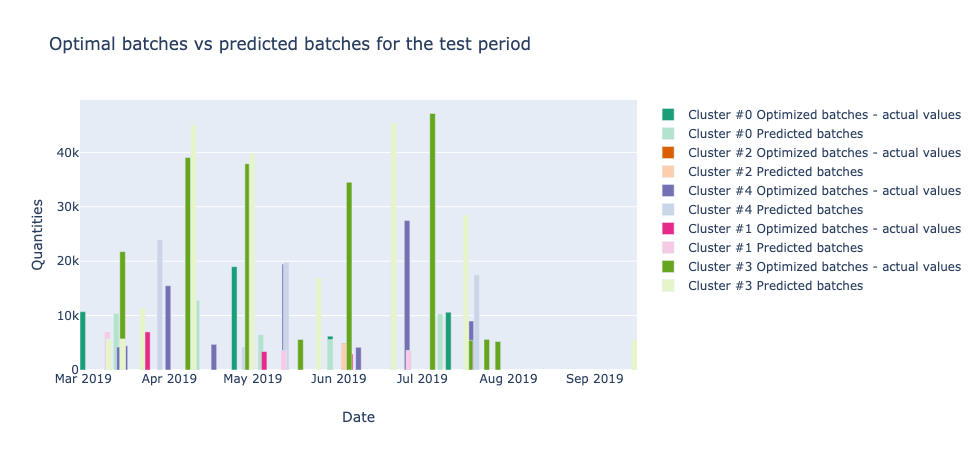

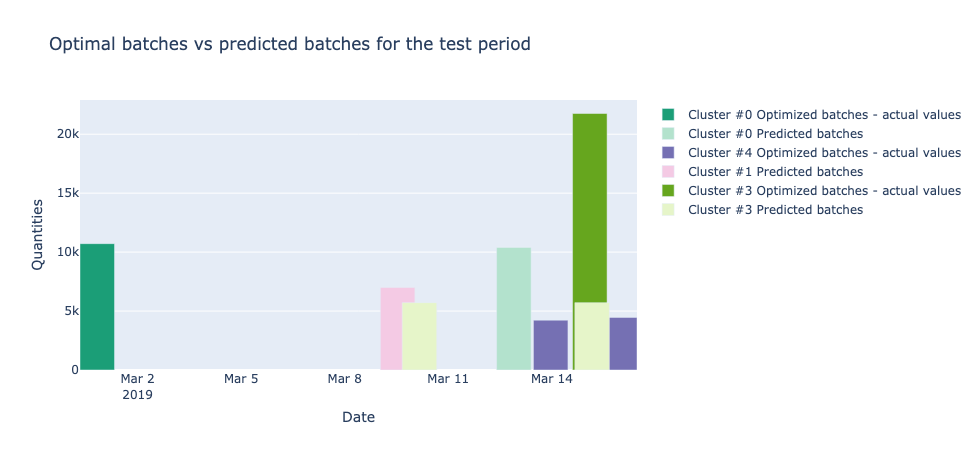

CPU times: user 1min 19s, sys: 862 ms, total: 1min 20s
Wall time: 1min 21s


In [6]:
%%time
optimal_batches,predicted_batches,preds=FaaS.get_predicted_batches(sales_clusters_df,
                                                       '2019-03-01','20 days',False,'20 days')

In [8]:
import seaborn as sns

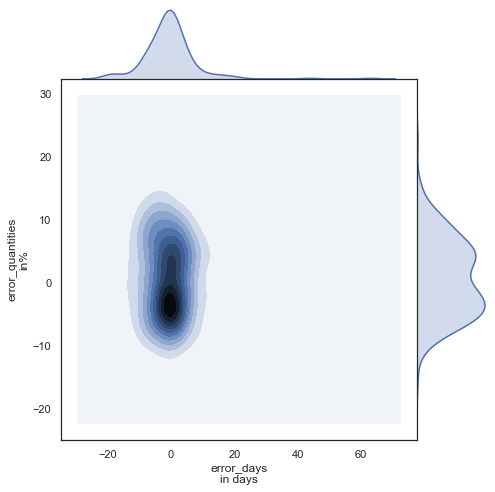

In [10]:
sns.set(style="white")
# Show the joint distribution using kernel density estimation
g = sns.jointplot(pd.Series(preds['error_days'].values/(24*60*60*1e9),name='error_days\nin days'),
                  pd.Series(preds['error_quantities'].values, name='error_quantities\nin%'),
                  kind="kde", height=7, space=0)

# To do:
-  Redo it at a cluster level instead of a product level
-  Try to incorporate seasonality impact in the simulated dataset
- Try the R changepoint package from Lancaster University
- Fully use the CookieCutter structure
- Integrate it in AWS